Sophia Walton - srw9rx
CS 3501 - Foundations of Data Analysis 
Homework 1

1. Say 12% of the population is rich, 8% of the population is famous, and 6% of the population
is both rich and famous. Define events R = “person is rich” and F = “person is famous”
for some randomly selected person in the population. Write an expression for each of the
following events using set operations involving the events R and F. Here you can just give
the answer, and do not need to show any work.
Example: “The person is rich and famous” would be the event R ∩ F.
(a) The person is not famous.
(b) The person is rich but not famous.
(c) The person is either rich or famous (or both).
(d) The person is neither rich nor famous.

a. P(F^c)

b. P(R $\cap$ $F^c$)

c. P(R $\cup$ F)

d. P($R^c$ $\cap$ $F^c$)

2. Calculate the probabilities for each of the four events in the previous problem. Be sure to
show your intermediate steps and list any probability rules that you use.
Example: The probability for “The person is rich and famous” would be P(R ∩ F) = 0.06.

a. P(F^c)=1-P(F)=1-0.08=92%
I arrived at this via the complement rule of probability. 

b. P(R $\cap$ $F^c$)=P(R)-P(R $\cap$ F)=0.12-0.06 = 6%
I arrived at this via the complement rule of probability and the exclusion principle of probability.

c. P(R $\cup$ F)=P(R)+P(F)-P(R $\cap$ F)=0.12+0.08-0.06=14%
I arrived at this conclusion through the definition of exclusion in probability. 

d. P($R^c$ $\cap$ $F^c$) =1 - P(R $\cup$ F)= 1-0.14 = 86%
I arrived at this via the complement rule of probability being applied multiple times as well as by referencing the methods used for answering the previous part of the question.

3. You have two black socks, two white socks, two red socks, and two blue socks in your sock
drawer. If you pick two socks out at random (without looking!), what is the probability that
they match? Explain how you arrived at the answer, don’t just give a number!

Events: Pulling a black sock = A; Pulling a White sock = B; Pulling a red sock = C; Pulling a blue sock =D
P(match)=P(AA)+P(BB)+P(CC)+P(DD)

=($\frac{1}{4}$)($\frac{1}{7}$)+($\frac{1}{4}$)($\frac{1}{7}$)+($\frac{1}{4}$)($\frac{1}{7}$)+($\frac{1}{4}$)($\frac{1}{7}$)

=4($\frac{1}{4}$)($\frac{1}{7}$)

=4($\frac{1}{28}$)

=$\frac{1}{7}$


4. According to the American Lung Association, there is a 0.13% chance to develop lung cancer.
Of the people who have lung cancer, 90% of them are smokers. In the population of people
who do not have lung cancer, 16.9% are smokers.
(a) What percentage of the total population are smokers?
(b) If you are a smoker, what is your probability to develop lung cancer?
(c) If you are not a smoker, what is your probability to develop lung cancer?

given:
P(C)=0.0013
P(S|C)=0.9
P(S|$C^c$) = 0.169

a. P(S) = P(S|C)*P(C) + P(S|$C^c$)P($C^c$)

=0.9(0.0013)+(0.169)(1-0.0013)=0.9(0.0013)+(0.169)(0.87)

=0.16995

b. P(C|S) = $\frac{P(S|C)*P(C)}{P(S)}$

= 0.9*0.0013/0.16995

= 0.00688

c. P(C|$S^C$) = P$\frac{P(S^C|C)*P(C)}{P(S^C)}$

=$\frac{(1-P(S|C)*P(C)}{(1-P(S)}$

= (0.1)(0.0013)/0.83005

= 0.000157

5. In this exercise we will be using data from the OASIS brain database, a publicly-available
resource:
http://www.oasis-brains.org
You will be classifying dementia from the volume of the hippocampus, a brain structure that
is critical to memory. The data you will use is in the spreadsheet OASIS-hippocampus.csv,
which you can download from the class website. The data consists of the hippocampal volume,
derived from MRI, for elderly subjects, including healthy control subjects and those with mild
to moderate dementia. Model the right hippocampal volume (RightHippoVol) as a normal
random variable X1 and the left hippocampal volume (LeftHippoVol) as a normal random
variable X2. Then model the diagnosis (Dementia) as a binary random variable Y (Y = 0:
healthy control, Y = 1: dementia). Use the training subset of the data (TrainData = 1) to
learn the mean and variance parameters for a na¨ıve Bayes classifier. Finally, apply your na¨ıve
Bayes classifier to get a probabilistic diagnosis of the test subset of the data (TrainData = 0).
Do the following:
 Plot the data as a 2D scatterplot (right and left hippocampal volume as the two axes).
Use two different colors for the two classes (healthy/dementia). Do you think there is
separation between the two classes?
 Plot two density plots for the left and right hippocampus volumes. Again, plot a different
density for the two classes (with the same colors as your scatterplot).
 Run your classifier on the testing data. For each data point, if your classifier probability
is greater than 0.5, predict that it is a dementia patient. Then compare with the actual
label to see if your classifier is correct. Report your classifier accuracy on the testing
data (number of correct classifications divided by size of the test data).
Note: There are Python machine learning libraries that include a method for na¨ıve Bayes.
You can’t use these to solve this problem! You have to write your own code to implement
na¨ıve Bayes. However, it’s okay to try out a library’s version to check if it gives a similar
answer to your code.

In [2]:
#import statements 
from matplotlib import pyplot as plt 
from scipy.stats import norm 
import pandas 
import numpy as np

#import the csv
hippocampus = pandas.read_csv('/Users/sophiawalton/Desktop/CS3501/Homework1 /OASIS-hippocampus.csv', header=0)

#create a dataframe of the right hippocampus 
rightVolume = pandas.DataFrame(hippocampus, columns= ['RightHippoVol'])
leftVolume = pandas.DataFrame(hippocampus, columns =['LeftHippoVol'])
#print (rightVolume)

In [3]:
#create important statistics for right hippocampus volume (normal distribution)
meanRight = rightVolume['RightHippoVol'].mean()
sdRight = rightVolume['RightHippoVol'].std()
minRight = rightVolume['RightHippoVol'].min()
maxRight = rightVolume['RightHippoVol'].max()

#create important statistics for left hippocampus volume (normal distribution)
meanLeft = leftVolume['LeftHippoVol'].mean()
sdLeft = leftVolume['LeftHippoVol'].std()
minLeft = leftVolume['LeftHippoVol'].min()
maxLeft = leftVolume['LeftHippoVol'].max()

In [4]:
#create the range for graphing (right volume)
rightranges = np.arange(minRight, maxRight, 1)
graphbaseright = norm.pdf(rightranges, meanRight, sdRight)

#create the range for graphing (left volume)
leftranges = np.arange(minLeft, maxLeft, 1)
graphbaseleft = norm.pdf(leftranges, meanLeft, sdLeft)

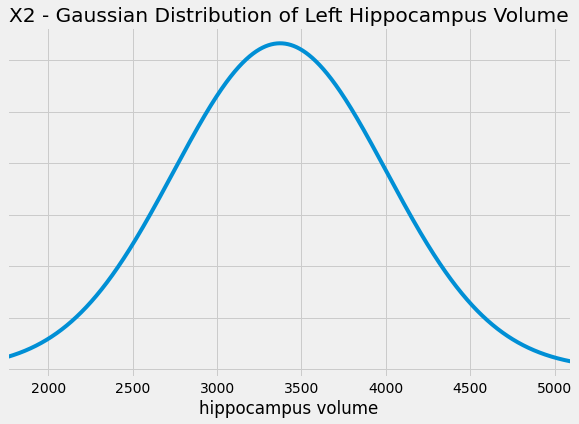

In [5]:
#build plot of X1 
fig, x1 = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
x1.plot(rightranges,graphbaseright)

x1.set_xlim([minRight,maxRight])
x1.set_xlabel('hippocampus volume')
x1.set_yticklabels([])
x1.set_title('X1 - Gaussian Distribution of Right Hippocampus Volume')

#plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

#build plot of X2 
fig, x2 = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
x2.plot(leftranges, graphbaseleft)

x2.set_xlim([minLeft,maxLeft])
x2.set_xlabel('hippocampus volume')
x2.set_yticklabels([])
x2.set_title('X2 - Gaussian Distribution of Left Hippocampus Volume')

#plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()


In [6]:
#create data frame with the information required to group 
dementiadata = pandas.DataFrame(hippocampus, columns =["RightHippoVol", "LeftHippoVol", "TrainData", "Dementia"])
trainingData = dementiadata.groupby('TrainData').get_group(1).groupby('Dementia')

#create training groups of dementia and healthy 
trainingdementia = trainingData.get_group(1)
traininghealth = trainingData.get_group(0)

#create testing group
testingdata = dementiadata.groupby('TrainData').get_group(0)

In [7]:
#create classifier statistics from information 
print("Important Statistics about the Classes: ")
#left hippocampus, dementia
demMeanLeft = trainingdementia['LeftHippoVol'].mean()
demVarLeft = trainingdementia['LeftHippoVol'].var()
demMinLeft = trainingdementia['LeftHippoVol'].min()
demMaxLeft = trainingdementia['LeftHippoVol'].max()

print("\n dementia mean left", demMeanLeft, "\n dem Var Left", demVarLeft, "\n dementia min left", demMinLeft, "\n dementia max left", demMaxLeft)

#right hippocampus, dementia
demMeanRight = trainingdementia['RightHippoVol'].mean()
demVarRight = trainingdementia['RightHippoVol'].var()
demMinRight = trainingdementia['RightHippoVol'].min()
demMaxRight = trainingdementia['RightHippoVol'].max()

print("\n dementia mean Right", demMeanRight, "\n dementia var right", demVarRight, "\n dementia min Right", demMinRight, "\n dementia max Right", demMaxRight)

#left hippocampus, healthy
healthMeanLeft = traininghealth['LeftHippoVol'].mean()
healthVarLeft = trainingdementia['LeftHippoVol'].var()
healthMinLeft = traininghealth['LeftHippoVol'].min()
healthMaxLeft = traininghealth['LeftHippoVol'].max()

print("\n healthy mean left", healthMeanLeft, "\n healthy var left", healthVarLeft,"\n healthy min left", healthMinLeft, "\n health max left", healthMaxLeft)

#right hippocampus, healthy
healthMeanRight = traininghealth['RightHippoVol'].mean()
healthVarRight = traininghealth['RightHippoVol'].var()
healthMinRight = traininghealth['RightHippoVol'].min()
healthMaxRight = traininghealth['RightHippoVol'].max()

print("\n healthy mean Right", healthMeanRight, "\n healthy var right", healthVarRight,"\n healthy min Right", healthMinRight, "\n healthy max Right", healthMaxRight)

Important Statistics about the Classes: 

 dementia mean left 2960.0 
 dem Var Left 294575.06666666665 
 dementia min left 1758 
 dementia max left 4265

 dementia mean Right 3176.6739130434785 
 dementia var right 314594.4024154589 
 dementia min Right 1984 
 dementia max Right 4747

 healthy mean left 3666.0454545454545 
 healthy var left 294575.06666666665 
 healthy min left 2565 
 health max left 5095

 healthy mean Right 3882.681818181818 
 healthy var right 301651.42027972033 
 healthy min Right 2817 
 healthy max Right 5142


In [8]:
#plot scatterplot of training data 
fig, ytrain = plt.subplots(figsize=(10, 6))

ytrain.scatter(x = trainingdementia['RightHippoVol'], y = trainingdementia['LeftHippoVol'], color ='red')
ytrain.scatter(x = traininghealth['RightHippoVol'], y = traininghealth['LeftHippoVol'], color ='blue')
plt.xlabel("right hippocampus volume")
plt.ylabel("left hippocampus volume")
plt.title("Training Data Scatterplot of Hippocampus Volume")

plt.show()

In [9]:
#create normal classifier part 
from math import sqrt, exp, pi
num_dem = trainingData.sum()

def create_classifier(x, var, mean):
 exponent = exp(-((x-mean)**2 / (2 * var )))
 return (1 / (sqrt(2 * pi) * sqrt(var))) * exponent

def classifying(i, demvar, demmean, healthv, healthm):
    returnlist = []
    for item in i:
        prob_xgivendementia = create_classifier(item, demvar, demmean)
        prob_xgivenhealthy= create_classifier(item, healthv, healthm)
        pofx = prob_xgivendementia*(0.5)+prob_xgivenhealthy*(0.5)
        pofdementia=(prob_xgivendementia*0.5)/pofx
        pofhealthy=(prob_xgivenhealthy*0.5)/pofx
        if (pofdementia>0.5):
            returnlist.append(1)
        else:
            returnlist.append(0)  
    return returnlist;   
        
#left hippocampus
dementiaFromLeft = classifying(testingdata['LeftHippoVol'], demVarLeft, demMeanLeft, healthVarLeft, healthMeanLeft)
#leftadded = testingdata.assign(leftdata = dementiaFromLeft)

#right hippocampus 
dementiaFromRight = classifying(testingdata['RightHippoVol'], demVarRight, demMeanRight, healthVarRight, healthMeanRight)
leftandright = testingdata.assign(rightdata = dementiaFromRight).assign(leftdata = dementiaFromLeft)


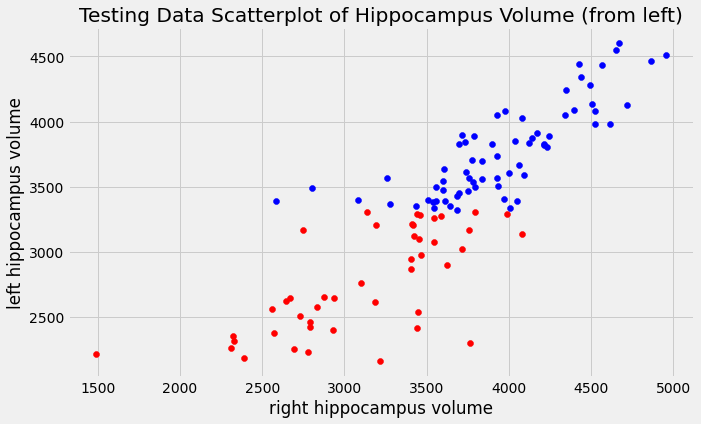

In [10]:
#plot of left testing data
leftplotdementia = leftandright.groupby('leftdata').get_group(1)
leftplothealthy= leftandright.groupby('leftdata').get_group(0)
fig, leftplot = plt.subplots(figsize=(10, 6))

leftplot.scatter(leftplotdementia['RightHippoVol'], leftplotdementia['LeftHippoVol'],color ='red')
leftplot.scatter(leftplothealthy['RightHippoVol'], leftplothealthy['LeftHippoVol'], color ='blue')
plt.xlabel("right hippocampus volume")
plt.ylabel("left hippocampus volume")
plt.title("Testing Data Scatterplot of Hippocampus Volume (from left)")

plt.show()

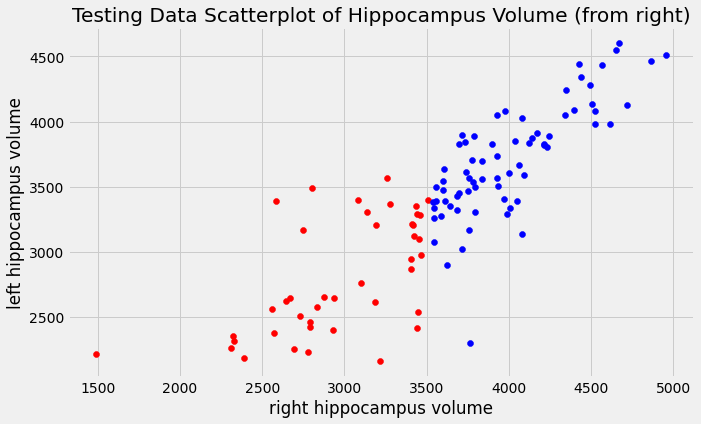

In [11]:
#plot of right testing data
rightplotdementia = leftandright.groupby('rightdata').get_group(1)
rightplothealthy= leftandright.groupby('rightdata').get_group(0)
fig, leftplot = plt.subplots(figsize=(10, 6))

leftplot.scatter(rightplotdementia['RightHippoVol'], rightplotdementia['LeftHippoVol'],color ='red')
leftplot.scatter(rightplothealthy['RightHippoVol'], rightplothealthy['LeftHippoVol'], color ='blue')
plt.xlabel("right hippocampus volume")
plt.ylabel("left hippocampus volume")
plt.title("Testing Data Scatterplot of Hippocampus Volume (from right)")

plt.show()

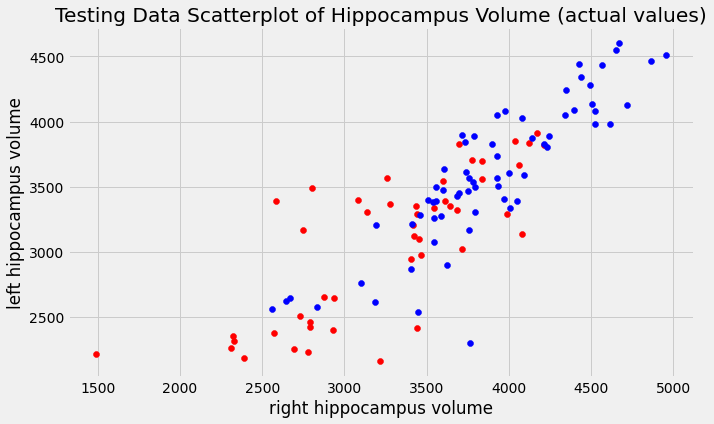

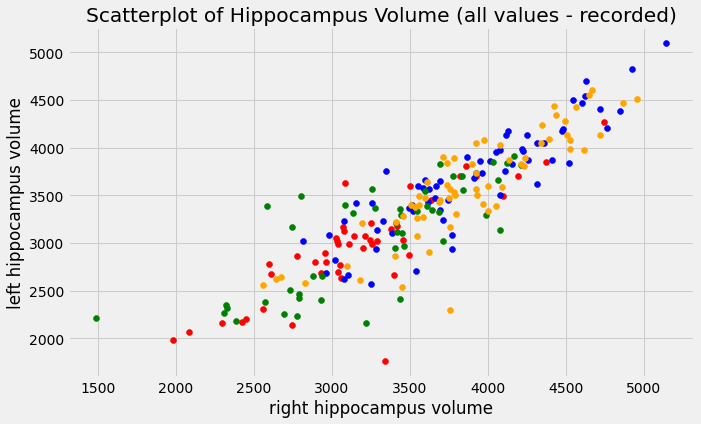

In [12]:
#actual plot

actualdem = leftandright.groupby('Dementia').get_group(1)
actualh= leftandright.groupby('Dementia').get_group(0)
fig, actualplot = plt.subplots(figsize=(10, 6))

actualplot.scatter(actualdem['RightHippoVol'], actualdem['LeftHippoVol'],color ='red')
actualplot.scatter(actualh['RightHippoVol'], actualh['LeftHippoVol'], color ='blue')
plt.xlabel("right hippocampus volume")
plt.ylabel("left hippocampus volume")
plt.title("Testing Data Scatterplot of Hippocampus Volume (actual values)")

plt.show()

print ("\n")
#all data 
alldata = pandas.DataFrame(hippocampus, columns =["RightHippoVol", "LeftHippoVol", "TrainData", "Dementia"])
dem_train= alldata.groupby("TrainData").get_group(1).groupby("Dementia").get_group(1)
h_train= alldata.groupby("TrainData").get_group(1).groupby("Dementia").get_group(0)
dem_test= alldata.groupby("TrainData").get_group(0).groupby("Dementia").get_group(1)
h_test= alldata.groupby("TrainData").get_group(0).groupby("Dementia").get_group(0)

#plot
fig, allplot = plt.subplots(figsize=(10, 6))

allplot.scatter(dem_train['RightHippoVol'], dem_train['LeftHippoVol'],color ='red')
allplot.scatter(h_train['RightHippoVol'], h_train['LeftHippoVol'], color ='blue')
allplot.scatter(dem_test['RightHippoVol'], dem_test['LeftHippoVol'],color ='green')
allplot.scatter(h_test['RightHippoVol'], h_test['LeftHippoVol'], color ='orange')
plt.xlabel("right hippocampus volume")
plt.ylabel("left hippocampus volume")
plt.title("Scatterplot of Hippocampus Volume (all values - recorded)")

plt.show()


In [21]:
#classifier accuracy

dementiaseries=pandas.Series(leftandright['Dementia'])
leftseries = pandas.Series(leftandright['leftdata'])
rightseries = pandas.Series(leftandright['rightdata'])

leftequal=0
rightequal=0
for i in range(0, len(dementiaseries)):
    print(leftseries.iat[i], dementiaseries.iat[i])
    if leftseries.iat[i] == dementiaseries.iat[i]:
        print(leftseries.iat[i] == dementiaseries.iat[i])
        leftequal+=1
    if rightseries.iat[i] == dementiaseries.iat[i]:
        rightequal+=1


print("classifier accuracy for left is:" , leftequal/225)
print("classifier accuracy for right is:", rightequa/225)
 



0 0
True
1 0
0 0
True
0 0
True
1 1
True
0 0
True
1 0
0 0
True
1 1
True
0 1
1 1
True
0 0
True
1 1
True
0 0
True
1 0
0 1
1 1
True
1 1
True
1 1
True
0 0
True
1 0
0 0
True
0 0
True
0 0
True
1 0
0 0
True
0 0
True
0 0
True
0 1
1 0
1 0
0 0
True
0 0
True
0 0
True
0 0
True
0 1
1 1
True
0 0
True
1 1
True
0 0
True
0 0
True
1 1
True
1 1
True
0 0
True
1 1
True
1 0
0 0
True
0 0
True
0 0
True
0 0
True
1 0
1 0
0 0
True
0 1
0 0
True
0 0
True
0 0
True
0 0
True
1 1
True
1 0
0 1
0 0
True
0 0
True
0 0
True
1 1
True
1 1
True
1 1
True
1 1
True
1 1
True
0 0
True
1 0
0 0
True
0 1
0 0
True
1 1
True
0 1
0 1
1 1
True
1 0
1 1
True
1 1
True
0 0
True
1 1
True
0 0
True
0 0
True
0 0
True
0 0
True
1 0
1 0
0 1
1 1
True
1 1
True
1 1
True
0 1
0 1
0 1
0 0
True
1 0
0 1
1 0
0 0
True
0 1
1 0
0 0
True
0 1
0 1
0 0
True
1 1
True
0 1
0 1
0 1
0 0
True
0 0
True
classifier accuracy for left is: 0.0
classifier accuracy for right is: 0.0
